<h1>New Haven Crime and Analysis 2018<h1>
<h3>In 2018, there were 364,800 violent crime incidents, and 419,724 offenses reported by the United States by 7,610 law enforcement agencies that submitted.<h3>
<h3>High Crime Areas Include: City Point, Congress Ave/Ward St, Chapel St, Sherman Ave, Goffe St/Dixwell Ave, Grand Ave/Ferry St, Eastern St./Foxon St.<h3>

In [2]:
#%pip install pandas_profiling
import pandas as pd
from collections import Counter
import matplotlib as plot
import seaborn as sns
from scipy.stats import norm
import numpy as np
from pandas_profiling import ProfileReport

incident_list = pd.read_csv (r'incidents/New Haven Incident Reports 2018.csv',index_col=2)
offense_list = pd.read_csv (r'incidents/NIBRS_OFFENSE.csv',index_col=0)
offense_type = pd.read_csv (r'incidents/NIBRS_OFFENSE_TYPE.csv',index_col=1)
location_type = pd.read_csv(r'incidents/NIBRS_LOCATION_TYPE.csv',index_col=1)
drug_use = pd.read_csv(r'incidents/NIBRS_SUSPECTED_DRUG.csv',index_col=0)
drug_type = pd.read_csv(r'incidents/NIBRS_SUSPECTED_DRUG_TYPE.csv',index_col=1)

incident_list

#offence_list= offence_list.values.tolist()
#offense_list['INCIDENT_ID'][:].value_counts()

count = offense_list["OFFENSE_TYPE_ID"].value_counts()

In [3]:
offense_type

,OFFENSE_TYPE_ID,OFFENSE_NAME,CRIME_AGAINST,CT_FLAG,HC_FLAG,HC_CODE,OFFENSE_CATEGORY_NAME,OFFENSE_GROUP
OFFENSE_CODE,,,,,,,,
30A,71,Illegal Entry into the United States,Society,N,N,NaN,Other Offenses,A
30B,72,False Citizenship,Society,N,N,NaN,Other Offenses,A
30C,73,Smuggling Aliens,Society,N,N,NaN,Other Offenses,A
30D,74,Re-entry after Deportation,Society,N,N,NaN,Other Offenses,A
360,75,Failure to Register as a Sex Offender,Society,N,N,NaN,Other Offenses,A
...,...,...,...,...,...,...,...,...
90K,65,Failure to Appear,Society,N,N,NaN,Other Offenses,B
90L,66,Federal Resource Violations,Society,N,N,NaN,Other Offenses,B
90M,67,Perjury,Society,N,N,NaN,Other Offenses,B


<h1>On Average Crimes are happening around 2-3PM<h1>
<h1>Crimes are drastically increasing around 5-6PM<h1>
<h1>From 1AM-8AM Crimes drastically decrease, but 1AM-3AM there is still a medium of amount criminal activity.<h1>
<h1>The 4AM-7AM time-frames are low activity times, crime is very low during these times<h1>

In [4]:
mergeDf = pd.merge(offense_type, offense_list, left_on = ['OFFENSE_TYPE_ID','OFFENSE_TYPE_ID'], right_on = ['OFFENSE_TYPE_ID','OFFENSE_TYPE_ID'])

#mergeDf
profile = ProfileReport(incident_list, title='Pandas Profiling Report')
profile.to_widgets()

In [7]:

count = mergeDf["OFFENSE_NAME"].value_counts()
#numberofViolations #= list(count)
#numberofViolations
count

Destruction/Damage/Vandalism of Property       13852
Simple Assault                                 12029
Theft From Motor Vehicle                       10391
Drug/Narcotic Violations                        9921
All Other Larceny                               9631
Shoplifting                                     9269
Intimidation                                    7010
Burglary/Breaking & Entering                    6160
Motor Vehicle Theft                             5514
Theft From Building                             5223
Drug Equipment Violations                       3186
Credit Card/Automated Teller Machine Fraud      2677
Aggravated Assault                              2397
False Pretenses/Swindle/Confidence Game         2313
Weapon Law Violations                           2007
Theft of Motor Vehicle Parts or Accessories     1952
Impersonation                                   1686
Counterfeiting/Forgery                          1634
Identity Theft                                

In [8]:
#ax = mergeDf.plot.bar(x="OFFENSE_NAME", y='OFFENSE_TYPE_ID')
describeHOUR = incident_list["INCIDENT_HOUR"].describe()
describeHOUR

count    98717.000000
mean        13.206479
std          5.921760
min          0.000000
25%          9.000000
50%         14.000000
75%         18.000000
max         23.000000
Name: INCIDENT_HOUR, dtype: float64

In [9]:
#incident_list = incident_list.dropna(subset=["INCIDENT_HOUR"])
#incident_list["INCIDENT_HOUR"] = incident_list["INCIDENT_HOUR"].astype(int)
#ax = sns.distplot(incident_list["INCIDENT_HOUR"],kde=False)
crime_bar = mergeDf["OFFENSE_NAME"].value_counts().sort_values(ascending=False)

In [10]:
describeALL = incident_list.describe()
describeALL

,DATA_YEAR,AGENCY_ID,NIBRS_MONTH_ID,CARGO_THEFT_FLAG,INCIDENT_HOUR,CLEARED_EXCEPT_ID,INCIDENT_STATUS,DID
count,101401.0,101401.000000,1.014010e+05,0.0,98717.000000,101401.000000,101401.0,1.014010e+05
mean,2018.0,2231.351348,8.263966e+06,NaN,13.206479,5.994941,0.0,3.620270e+07
std,0.0,1133.316099,2.367197e+05,NaN,5.921760,0.126179,0.0,3.414892e+06
min,2018.0,2120.000000,7.881918e+06,NaN,0.000000,1.000000,0.0,3.488656e+07
25%,2018.0,2152.000000,8.019802e+06,NaN,9.000000,6.000000,0.0,3.504488e+07
50%,2018.0,2175.000000,8.261245e+06,NaN,14.000000,6.000000,0.0,3.509979e+07
75%,2018.0,2204.000000,8.419840e+06,NaN,18.000000,6.000000,0.0,3.515467e+07
max,2018.0,26203.000000,8.778932e+06,NaN,23.000000,6.000000,0.0,5.136215e+07


<h1>New Haven Crime Count 2018<h1>

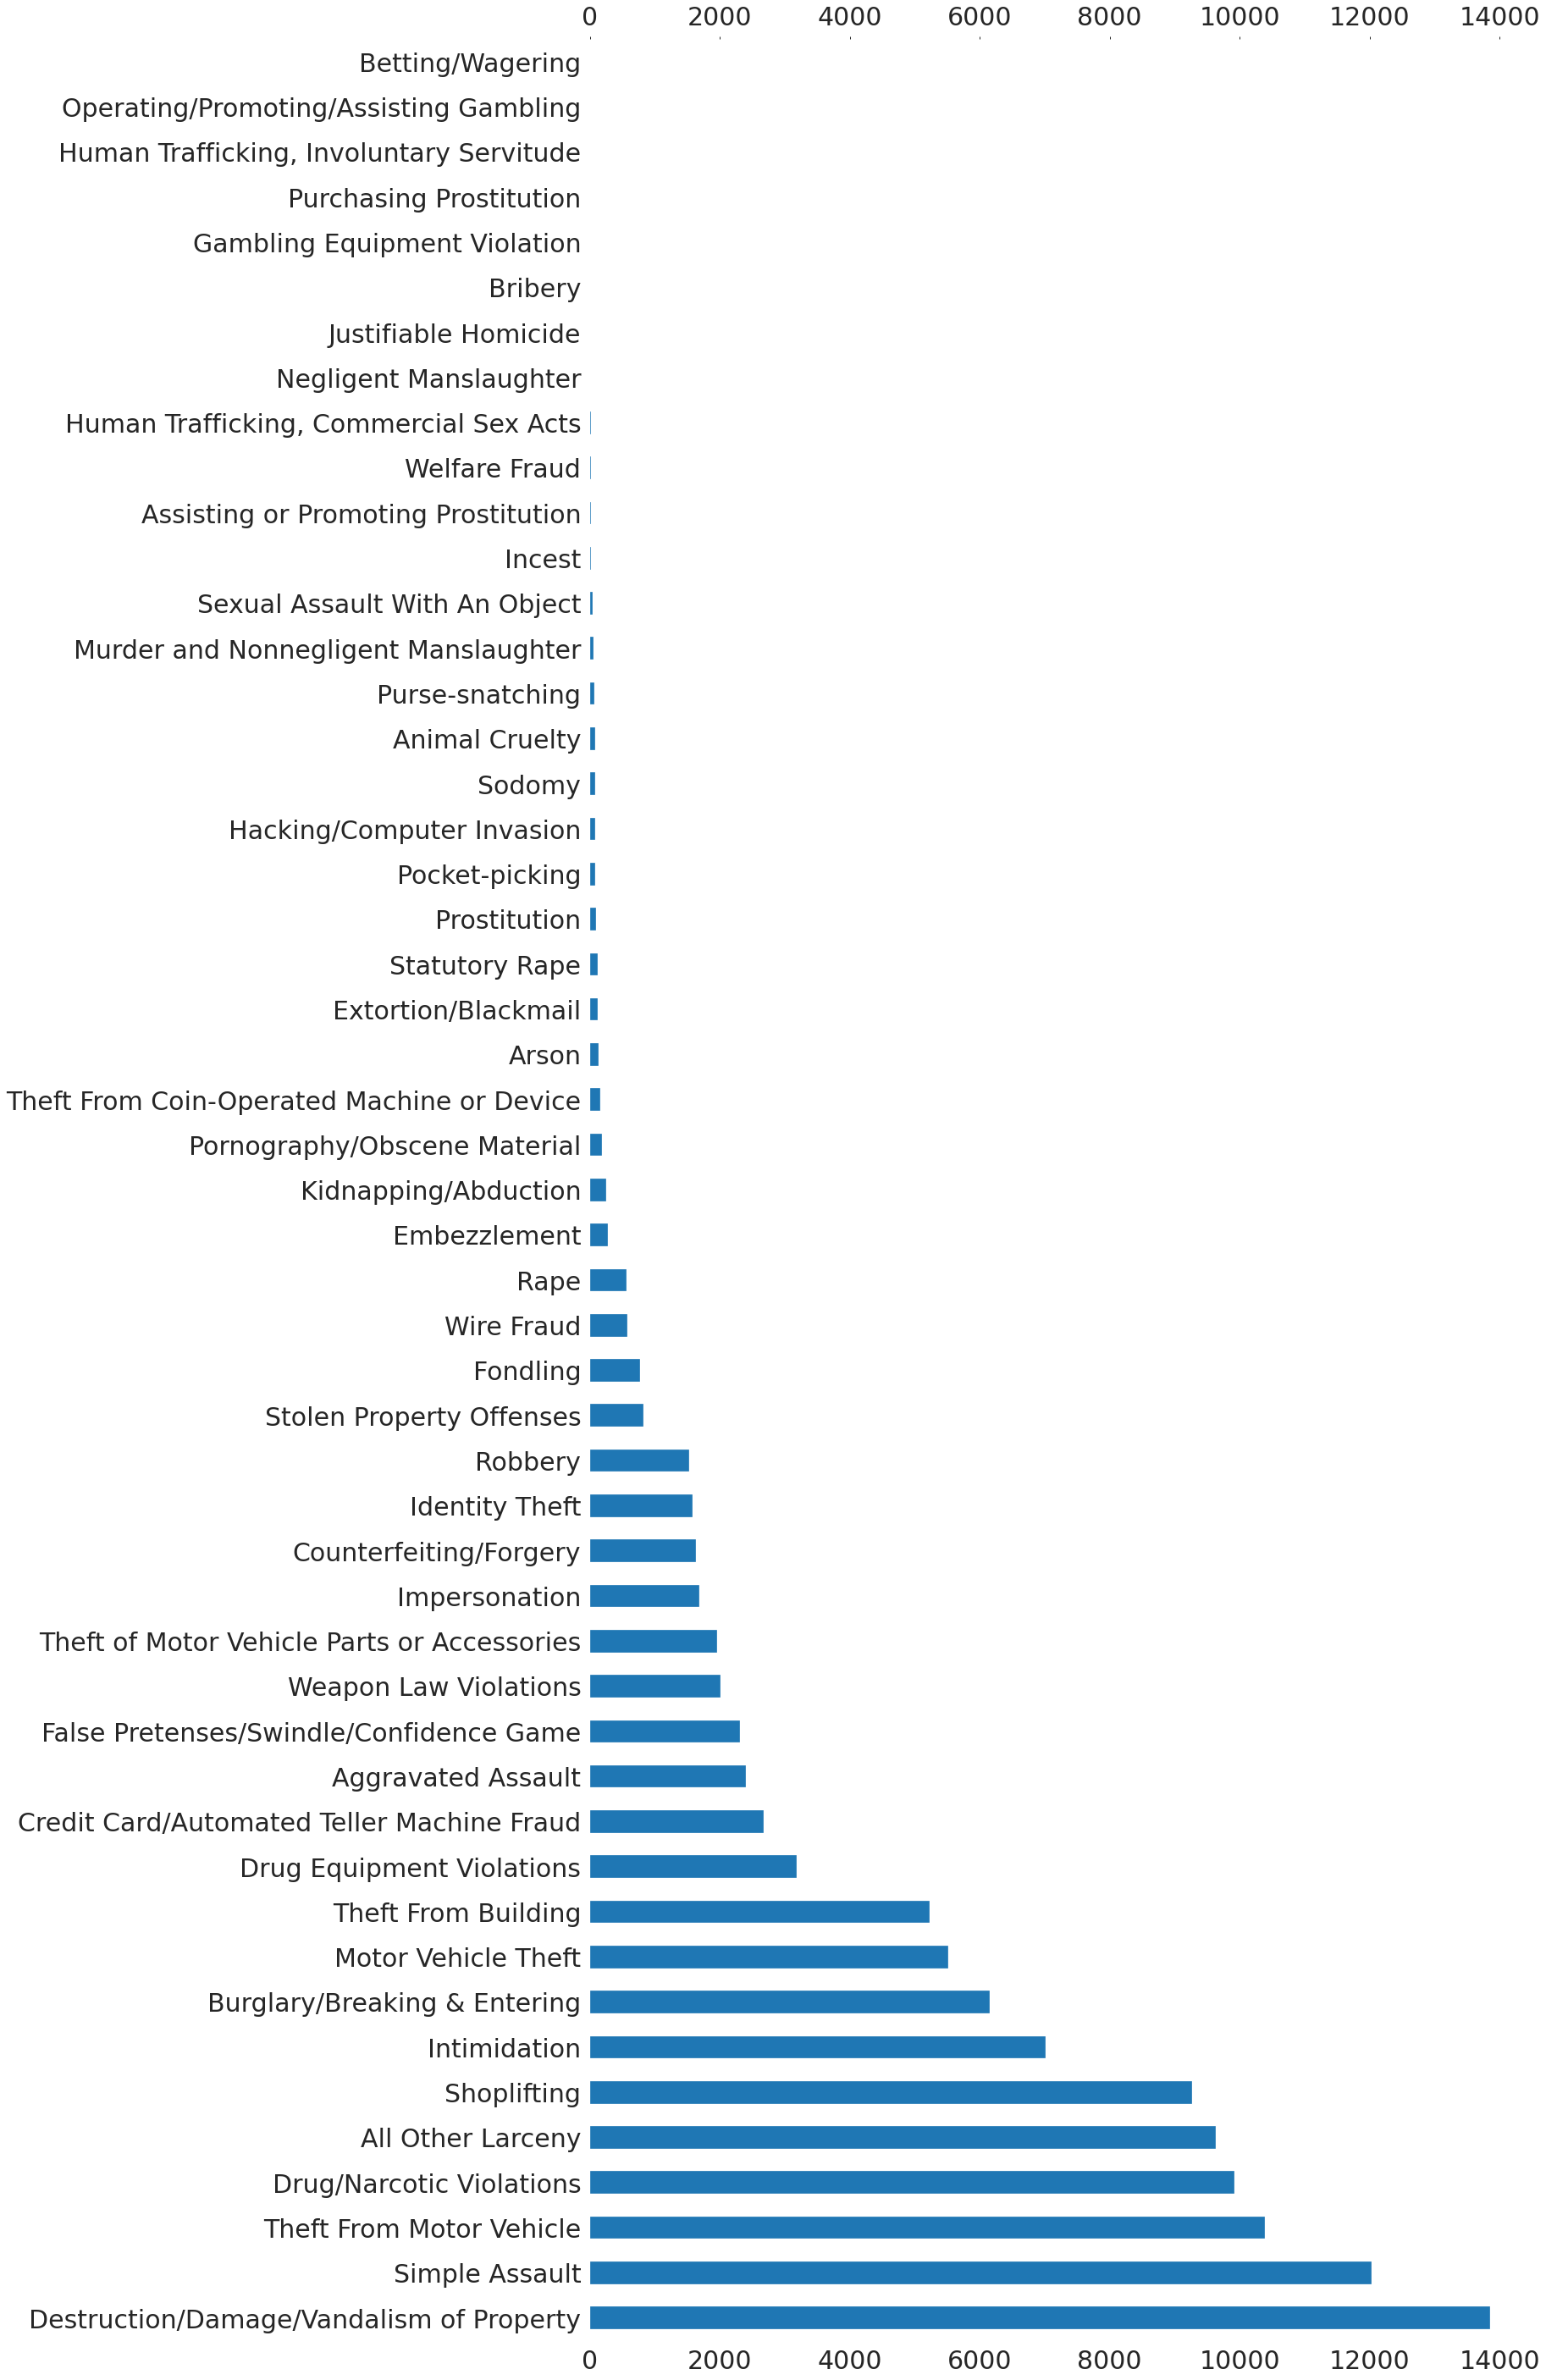

In [11]:
plot.rcParams['xtick.top'] = plot.rcParams['xtick.labeltop'] = True
crime_bar.plot(kind="barh", figsize=(20,50),fontsize=30)

<h1>New Haven Crime Count in Locations 2018<h1>

In [12]:
mergeDfLocation = pd.merge(location_type, offense_list, left_on = ['LOCATION_ID','LOCATION_ID'], right_on = ['LOCATION_ID','LOCATION_ID'])
count = mergeDfLocation["LOCATION_NAME"].value_counts()
count
location_bar = mergeDfLocation["LOCATION_NAME"].value_counts().sort_values()


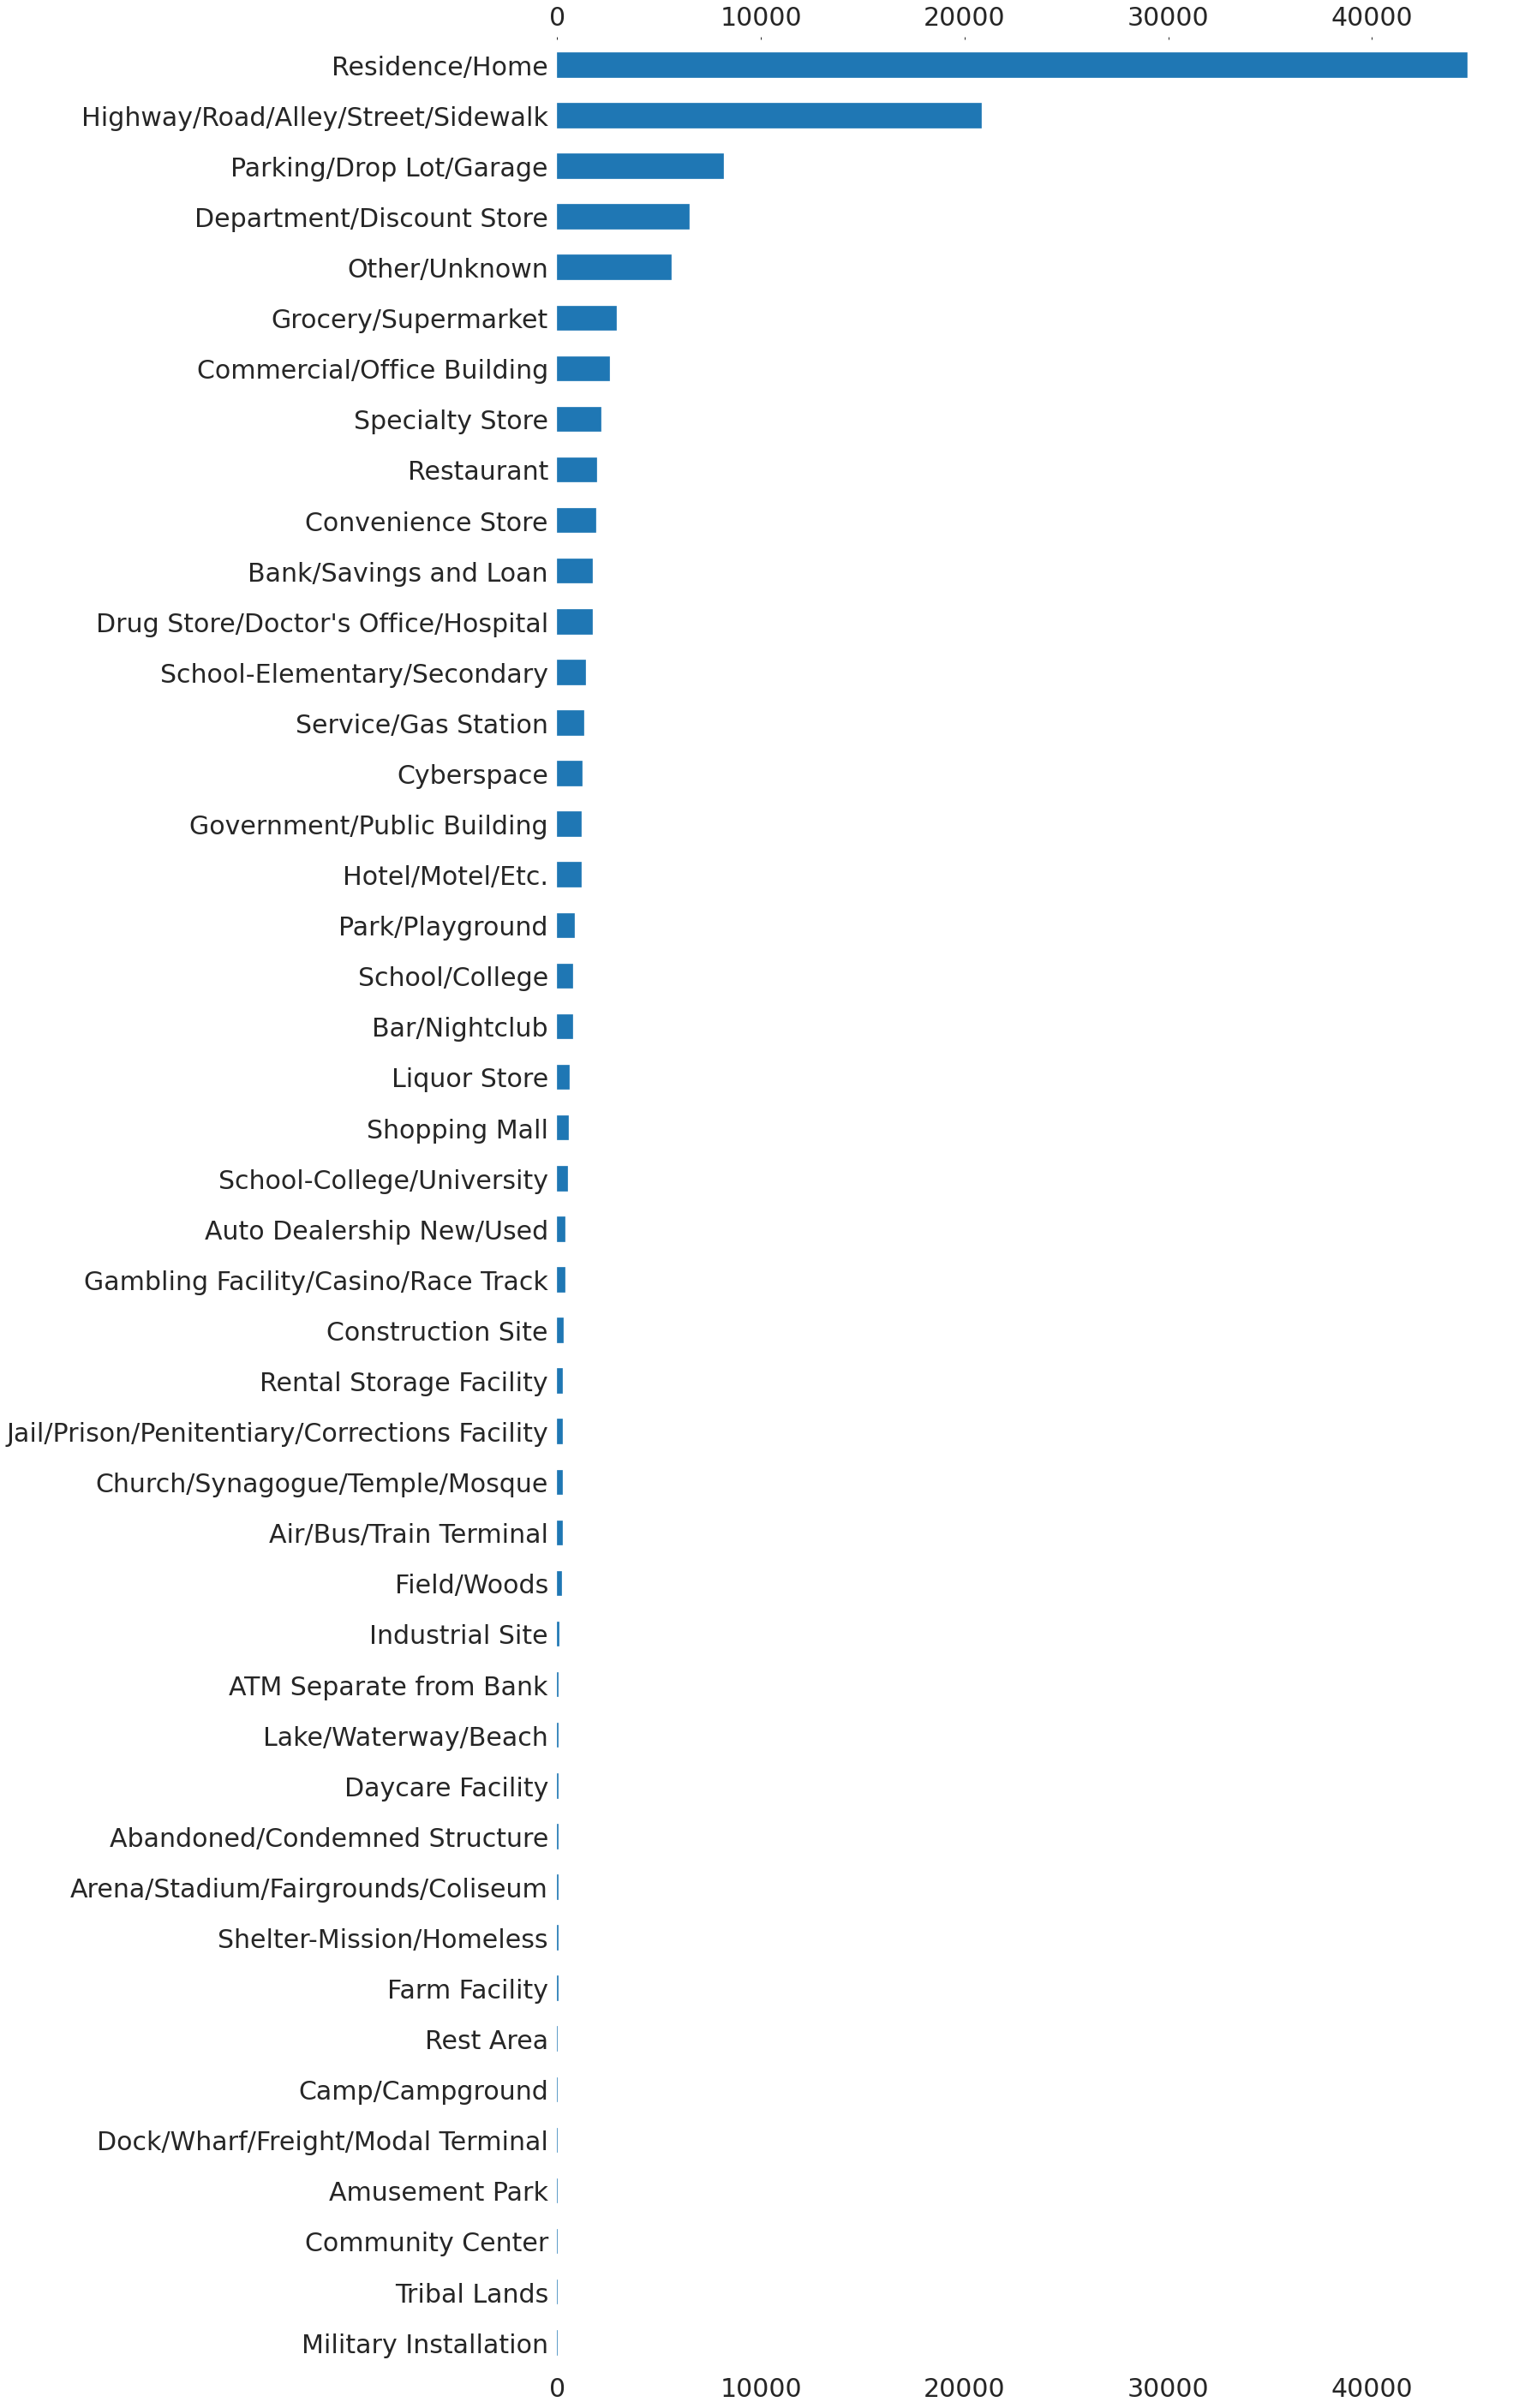

In [13]:
plot.rcParams['xtick.top'] = plot.rcParams['xtick.labeltop'] = True
location_bar.plot(kind="barh", figsize=(20,50),fontsize=30)

<h1>Drug Abuse in New Haven 2018<h1>

In [14]:
mergeDfDrugs = pd.merge(drug_use, drug_type, left_on = ['SUSPECTED_DRUG_TYPE_ID','SUSPECTED_DRUG_TYPE_ID'], right_on = ['SUSPECTED_DRUG_TYPE_ID','SUSPECTED_DRUG_TYPE_ID'])
count = mergeDfDrugs["SUSPECTED_DRUG_NAME"].value_counts()
count
drugs_bar = mergeDfDrugs["SUSPECTED_DRUG_NAME"].value_counts().sort_values(ascending=False)


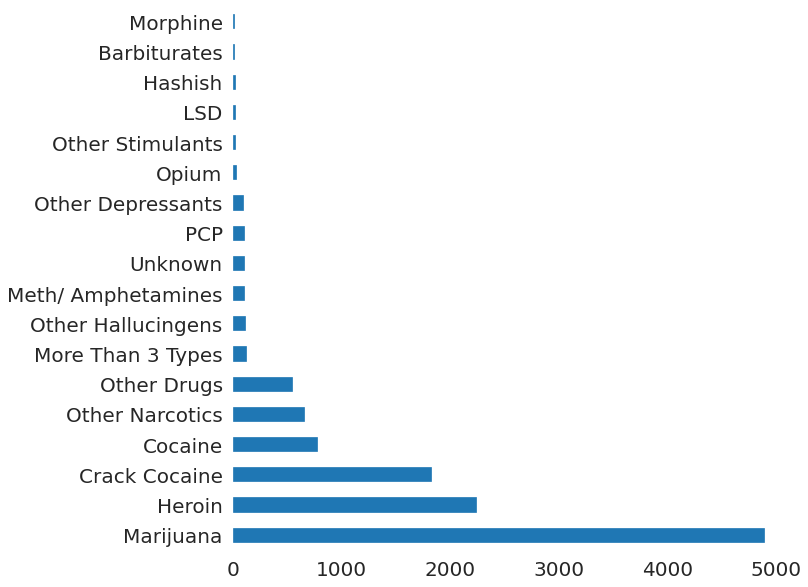

In [15]:
plot.rcParams['xtick.top'] = plot.rcParams['xtick.labeltop'] = False
#drugs_bar.plot.pie(figsize=(20,20),fontsize=20,autopct='%1.1f%%',labels=None).legend(labels=drugs_columns)
drugs_bar.plot(kind="barh",figsize=(10,10),fontsize=20)